In [3]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ff_energy.ffe.utils import read_from_pickle
import jax.numpy as jnp
from ff_energy.ffe.plot import plot_energy_MSE, plot_ff_fit
from ff_energy.ffe.structure import atom_key_pairs
from ff_energy.ffe.potential import LJ, akp_indx
from ff_energy.ffe.ff import FF
from ff_energy.ffe.ff_fit import LJ_bound, load_ff, fit_func, fit_repeat
from ff_energy.ffe.data import pairs_data
from ff_energy.ffe.utils import pickle_output, read_from_pickle, str2int




In [4]:
sig_bound = (0.001, 2.5)
ep_bound = (0.001, 2.5)
chg_bound = (100,2000)

CHGPEN_bound = [(chg_bound),(chg_bound),(chg_bound),(chg_bound),(0,2000)]
LJ_bound = ((sig_bound), (sig_bound), (ep_bound), (ep_bound))
DE_bound = ((sig_bound), (sig_bound), (ep_bound), (ep_bound), 
            (1, 8), (6, 20))

In [12]:
#  example
# ffpkl = "ECOL_pbe0dz_FOE.ff.pkl"
ffpkl = "kmdcm_pbe0dz_clusters.ff.pkl"

In [13]:
_c = next(read_from_pickle(f"ff/{ffpkl}"))
_c

FF: LJ water_cluster ELEC harmonic intE (jax_coloumb: True)

In [14]:
_c.data

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,...,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol,DUMMY,k,epol_mike,first_order_energy,epol_pairs
test0,-173.022645,test0,24.14023,-104.54998,20.41138,test0,-1527.133263,test0,20,-1527.276175,...,-88.423162,-77.478222,958362.266640,-958281.958385,-958370.381547,0,0,-197.910658,7.640822,-182.982917
test1,-105.096240,test1,25.25058,-63.45565,8.97296,test1,-1527.135387,test1,20,-1527.221635,...,-53.572842,-53.285800,958360.933743,-958282.584949,-958336.157791,0,1,-113.959761,-5.902676,-111.406093
test2,-144.567121,test2,24.75756,-89.34864,14.41942,test2,-1527.140946,test2,20,-1527.260418,...,-74.628103,-70.885989,958357.445616,-958285.865741,-958360.493844,0,2,-160.484782,-6.037152,-153.110225
test3,-105.558619,test3,21.75948,-62.57541,5.74741,test3,-1527.151295,test3,20,-1527.247454,...,-59.373736,-58.662892,958350.951437,-958292.985598,-958352.359334,0,3,-118.662845,-4.570214,-111.548989
test4,-141.957058,test4,21.69034,-90.29468,12.55821,test4,-1527.150321,test4,20,-1527.270835,...,-74.612483,-73.371184,958351.562845,-958292.418135,-958367.030618,0,4,-155.773808,-12.251942,-151.839749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test495,-156.403481,test495,24.92171,-95.04093,17.54292,test495,-1527.129876,test495,20,-1527.255655,...,-76.747423,-72.611238,958364.391623,-958280.758013,-958357.505436,0,495,-175.806320,-1.718463,-166.329665
test496,-126.839243,test496,15.65968,-75.31144,12.74644,test496,-1527.168887,test496,20,-1527.264530,...,-58.484893,-61.118914,958339.912612,-958304.589688,-958363.074582,0,496,-138.410126,2.169631,-133.079412
test497,-160.377711,test497,20.65947,-90.76807,24.76786,test497,-1527.154064,test497,20,-1527.248923,...,-58.307082,-57.960443,958349.213649,-958294.973785,-958353.280867,0,497,-178.929213,31.250204,-170.886865
test498,-154.210967,test498,21.38907,-87.19819,20.35679,test498,-1527.150078,test498,20,-1527.257280,...,-64.986090,-65.470853,958351.715184,-958293.538913,-958358.525003,0,498,-171.903376,15.363398,-164.288222


In [22]:
_c.intE = "epol_mike"
_c.elec = "ECOL"
_c.set_targets()
_c

FF: LJ water_cluster ECOL harmonic epol_mike (jax_coloumb: True)

In [23]:
_c.targets.mean()

Array(-14.625909, dtype=float32)

In [24]:
fit_repeat(_c, 
           1, 
           f"{ffpkl}_chgpen",
           bounds = CHGPEN_bound,
           loss="chgpen",
           # quiet='true'
          )

Optimizing LJ parameters...
function: get_loss_chgpen
bounds: [(100, 2000), (100, 2000), (100, 2000), (100, 2000), (0, 2000)]
maxfev: 10000
initial guess: [794.494334665212, 243.8025621600687, 1511.1646594254057, 1460.9743517138122, 426.01142344932776]


/home/boittier/Documents/phd/ff_energy/ff_energy/ffe/ff_fit.py:179: OptimizeWarning: Unknown solver options: pgtol
  res = minimize(


final_loss_fn:  13.347235679626465
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 13.347235679626465
             x: [ 8.802e+02  2.619e+02  1.817e+03  1.555e+03  7.075e+01]
           nit: 113
          nfev: 304
 final_simplex: (array([[ 8.802e+02,  2.619e+02, ...,  1.555e+03,
                         7.075e+01],
                       [ 8.802e+02,  2.619e+02, ...,  1.555e+03,
                         7.075e+01],
                       ...,
                       [ 8.802e+02,  2.619e+02, ...,  1.555e+03,
                         7.075e+01],
                       [ 8.802e+02,  2.619e+02, ...,  1.555e+03,
                         7.075e+01]]), array([ 1.335e+01,  1.335e+01,  1.335e+01,  1.335e+01,
                        1.335e+01,  1.335e+01]))


In [25]:
resx = _c.opt_parm 
loss = _c.get_loss_chgpen(resx)
loss
resx

array([ 880.16019678,  261.88033245, 1816.56113556, 1555.27052833,
         70.74944178])

In [26]:
np.sqrt(loss)

3.6533868

0.0


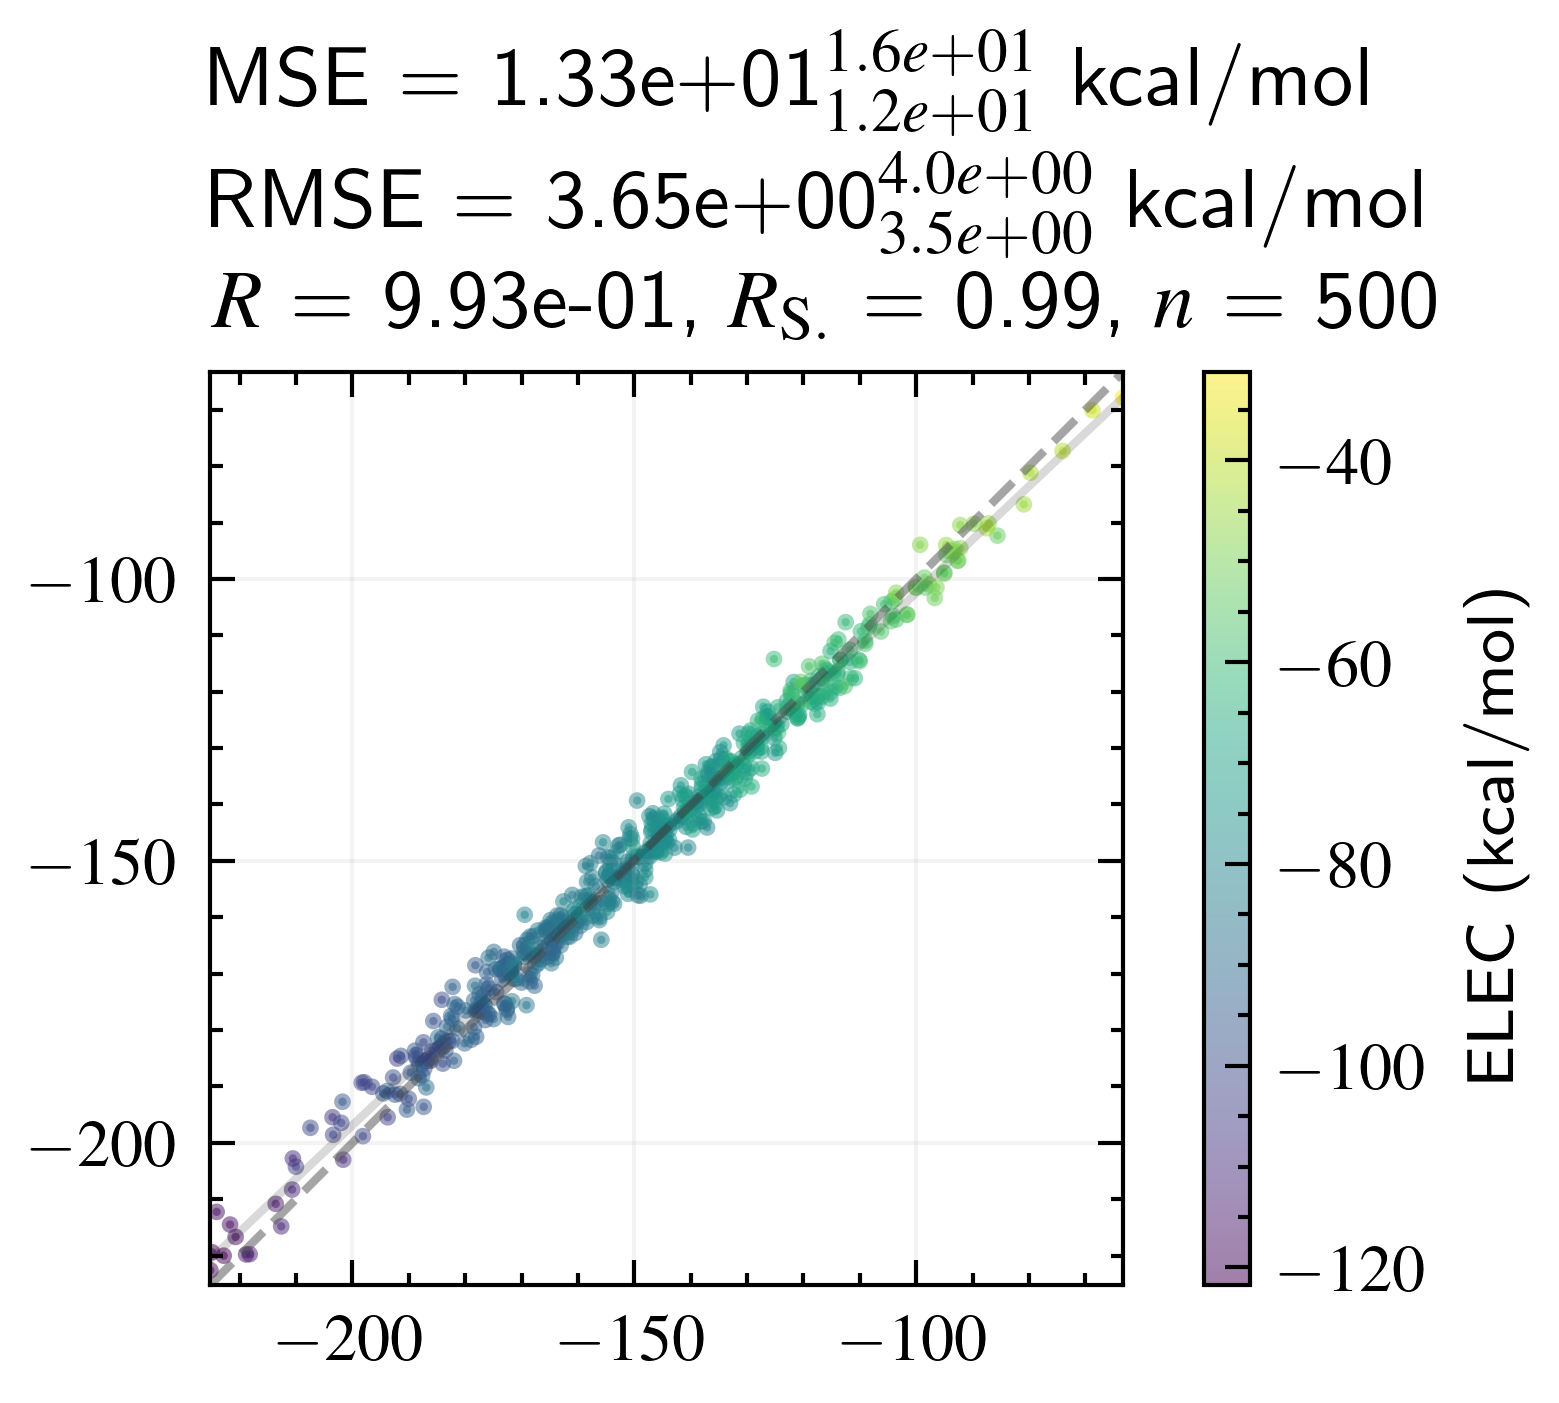

In [32]:
# _c.eval_jax_chgpen(resx ) 
_c.data["fit_ECOL"] =  _c.data[_c.elec] + _c.eval_jax_chgpen(resx ) 

plot_energy_MSE(_c.data, "epol_mike", "fit_ECOL",  elec = "ELEC")
plt.savefig("ECOLfit_vs_EPOL.pdf", bbox_inches="tight")

0.0


(<Axes: xlabel='NBOND energy\n(kcal/mol)', ylabel='CCSD(T) interaction energy\n(kcal/mol)'>,
 {'MSE': 3210.1909596343576,
  'RMSE': 56.65854710133642,
  'R': 0.974642974616211,
  'RS': 0.9712630530522122,
  'n': 500,
  'slope': 0.5898450470221722,
  'intercept': 0.7442057103565531})

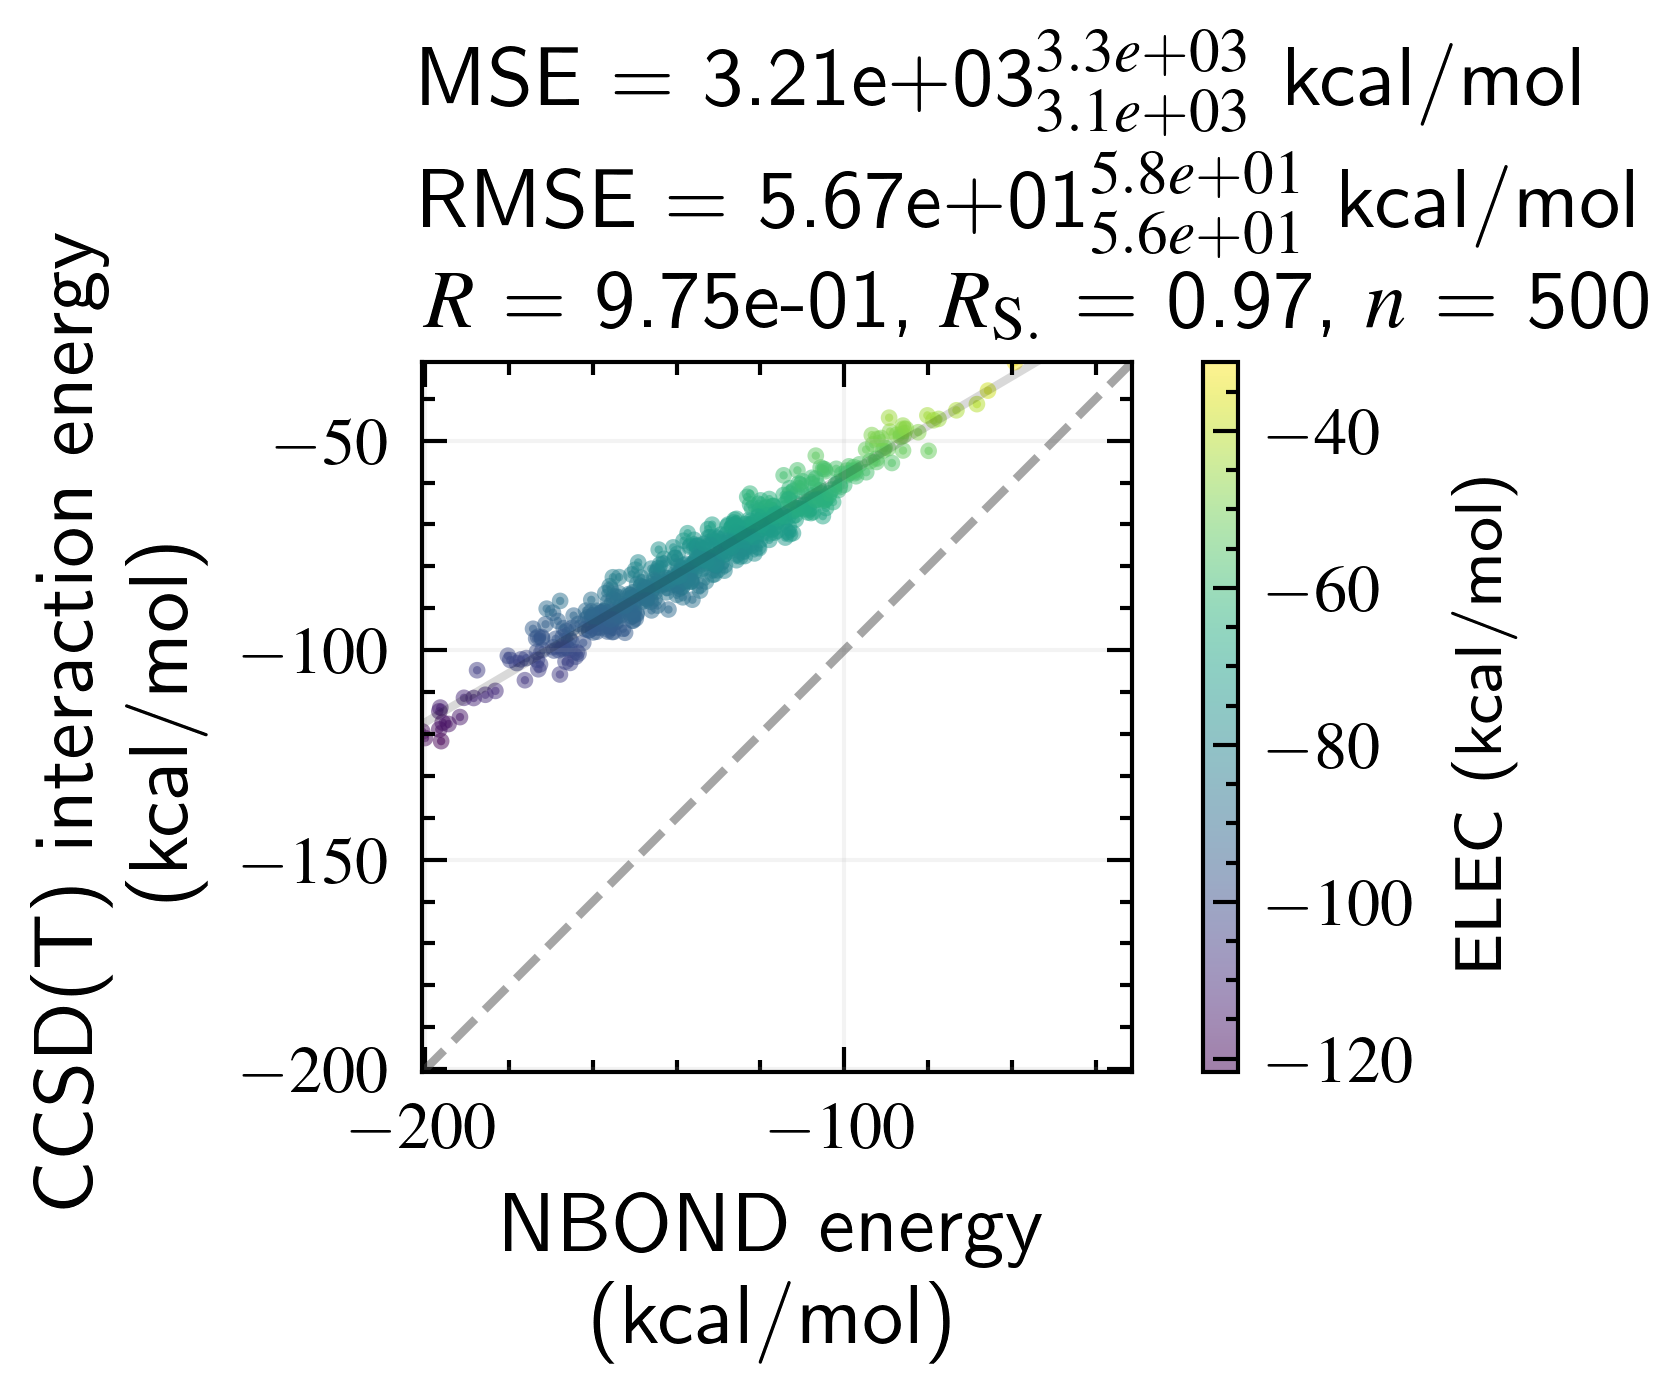

In [69]:
plot_energy_MSE(_c.data, "ECOL", "ELEC",  elec = "ELEC")

In [70]:
pickle_output(_c, "ff/fit_ECOL_kmdcm_intE")

#  LJ fit


In [71]:
# _c = next(read_from_pickle(f"ff/{ffpkl}"))

LJFF = next(read_from_pickle(f"ff/fit_ECOL_kmdcm_intE.pkl"))
LJFF.elec = "fit_ECOL"
LJFF.intE = "intE"

LJFF.set_targets()


In [72]:
LJFF.targets.mean()

Array(72.72947, dtype=float32)

In [73]:
# _c.targets

In [74]:
fit_repeat(LJFF, 
           10, 
           f"{ffpkl}_LJ",
           bounds = LJ_bound,
           loss="jax",
           quiet='true'
          )

/home/boittier/Documents/phd/ff_energy/ff_energy/ffe/ff_fit.py:175: OptimizeWarning: Unknown solver options: pgtol
  res = minimize(


In [75]:
pd.DataFrame(LJFF.opt_results).sort_values("fun")

,fun,nit,nfev,status,success,message,x,final_simplex
11,121.053009,558,974,0,True,Optimization terminated successfully.,"[0.0310922460658211, 2.5, 0.001, 0.00398804354...","([[0.0310922460658211, 2.5, 0.001, 0.003988043..."
6,121.054955,506,873,0,True,Optimization terminated successfully.,"[0.001, 2.4999999599773766, 0.001, 0.003997777...","([[0.001, 2.4999999599773766, 0.001, 0.0039977..."
8,121.054977,744,1281,0,True,Optimization terminated successfully.,"[0.001, 2.499996663643654, 0.001, 0.0039978359...","([[0.001, 2.499996663643654, 0.001, 0.00399783..."
10,121.058022,632,1087,0,True,Optimization terminated successfully.,"[0.001, 2.5, 0.0011018609025912546, 0.00399531...","([[0.001, 2.5, 0.0011018609025912546, 0.003995..."
0,134.365814,114,283,0,True,Optimization terminated successfully.,"[380.78824548291703, 653.3039183068825, 595.13...","([[380.78824548291703, 653.3039183068825, 595...."
1,134.367233,112,300,0,True,Optimization terminated successfully.,"[1423.1511374311847, 822.9119734170063, 1517.3...","([[1423.1511374311847, 822.9119734170063, 1517..."
4,391.540314,275,499,0,True,Optimization terminated successfully.,"[1.8077053089519544, 0.8900914108605007, 0.001...","([[1.8077053089519544, 0.8900914108605007, 0.0..."
2,5605.217285,72,184,0,True,Optimization terminated successfully.,"[0.0838338928468173, 0.001, 0.0501980044660067...","([[0.0838338928468173, 0.001, 0.05019800446600..."
3,5605.217285,41,138,0,True,Optimization terminated successfully.,"[0.05533643411579958, 0.001, 2.5, 0.3029386621...","([[0.05533643411579958, 0.001, 2.5, 0.30293866..."
5,5605.217285,51,155,0,True,Optimization terminated successfully.,"[0.001, 0.001, 2.4422709694878115, 2.5]","([[0.001, 0.001, 2.4422709694878115, 2.5], [0...."


In [76]:
best = list(pd.DataFrame(\
                  LJFF.opt_results)\
     .sort_values("fun").fun)[0]
np.sqrt(best)

11.00240923767168

#  DE fit


In [83]:
# _c = next(read_from_pickle(f"ff/{ffpkl}"))
DEFF = next(read_from_pickle(f"ff/fit_ECOL_kmdcm_intE.pkl"))
DEFF.elec = "fit_ECOL"
DEFF.intE = "intE"
DEFF.set_intE()
DEFF.set_targets()
print(DEFF.targets.mean())
DEFF

72.72947


FF: LJ water_cluster fit_ECOL harmonic intE (jax_coloumb: True)

In [84]:
fit_repeat(DEFF, 
           10, 
           "test",
           bounds = DE_bound,
           loss="jax_de",
           quiet='true'
          )

/home/boittier/Documents/phd/ff_energy/ff_energy/ffe/ff_fit.py:175: OptimizeWarning: Unknown solver options: pgtol
  res = minimize(


In [85]:
pd.DataFrame(DEFF.opt_results).sort_values("fun")

,fun,nit,nfev,status,success,message,x,final_simplex
5,92.318748,868,1453,0,True,Optimization terminated successfully.,"[0.8831182816948127, 2.499992023965443, 2.4999...","([[0.8831182816948127, 2.499992023965443, 2.49..."
3,92.532715,1823,2857,0,True,Optimization terminated successfully.,"[0.8922658543992088, 2.4998530821839076, 2.212...","([[0.8922658543992088, 2.4998530821839076, 2.2..."
7,106.166962,1401,2251,0,True,Optimization terminated successfully.,"[0.9678466737925855, 2.416164859019997, 0.4478...","([[0.9678466737925855, 2.416164859019997, 0.44..."
2,114.561356,986,1614,0,True,Optimization terminated successfully.,"[0.2920727539261203, 2.4999966342365596, 0.232...","([[0.2920727539261203, 2.4999966342365596, 0.2..."
9,117.770126,916,1524,0,True,Optimization terminated successfully.,"[1.3890215705761144, 2.043302417144694, 0.0011...","([[1.3890215705761144, 2.043302417144694, 0.00..."
8,118.484070,1080,1774,0,True,Optimization terminated successfully.,"[0.3954464820087108, 2.1689533057548775, 0.014...","([[0.3954464820087108, 2.1689533057548775, 0.0..."
11,119.562508,465,823,0,True,Optimization terminated successfully.,"[0.0030632729838533553, 2.029067860017455, 0.0...","([[0.0030632729838533553, 2.029067860017455, 0..."
0,134.365814,114,283,0,True,Optimization terminated successfully.,"[380.78824548291703, 653.3039183068825, 595.13...","([[380.78824548291703, 653.3039183068825, 595...."
1,134.367233,112,300,0,True,Optimization terminated successfully.,"[1423.1511374311847, 822.9119734170063, 1517.3...","([[1423.1511374311847, 822.9119734170063, 1517..."
4,250.904053,541,933,0,True,Optimization terminated successfully.,"[2.5, 0.3623997241588276, 0.018397038252931347...","([[2.5, 0.3623997241588276, 0.0183970382529313..."


In [86]:
list(pd.DataFrame(\
                  _c.opt_results)\
     .sort_values("fun").x)[0]

array([380.78824548, 653.30391831, 595.13255835, 480.99707744,
       263.88581207])

In [87]:
best = list(pd.DataFrame(\
                  DEFF.opt_results)\
     .sort_values("fun").fun)[0]
np.sqrt(best)

9.608264592220651